In [31]:
%matplotlib inline
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [32]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#set k_range = range(1,31) if you want to test EVERY k, and not just the odd ones
k_range = range(1,31,2)

xValues = []
yValues = []

#here I used odd numbers only in order to avoid ties within the KNN algorithm
#setting k_range to step by 1 still results in k=13 being the best estimator
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,iris.data,iris.target,cv=10)
    xValues.append(k)
    yValues.append(scores.mean())
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=96.00%; standard deviation=5.33%
k=3 ; mean accuracy=96.67%; standard deviation=4.47%
k=5 ; mean accuracy=96.67%; standard deviation=4.47%
k=7 ; mean accuracy=96.67%; standard deviation=4.47%
k=9 ; mean accuracy=97.33%; standard deviation=3.27%
k=11; mean accuracy=96.67%; standard deviation=4.47%
k=13; mean accuracy=98.00%; standard deviation=3.06%
k=15; mean accuracy=97.33%; standard deviation=3.27%
k=17; mean accuracy=97.33%; standard deviation=3.27%
k=19; mean accuracy=97.33%; standard deviation=3.27%
k=21; mean accuracy=96.67%; standard deviation=3.33%
k=23; mean accuracy=97.33%; standard deviation=3.27%
k=25; mean accuracy=96.67%; standard deviation=3.33%
k=27; mean accuracy=96.67%; standard deviation=4.47%
k=29; mean accuracy=95.33%; standard deviation=4.27%


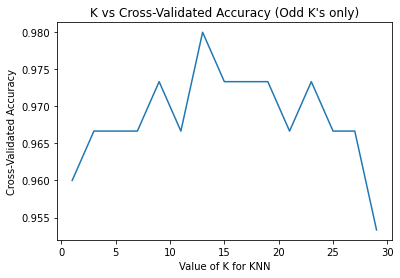

In [36]:
import matplotlib.pyplot as plt

plt.title("K vs Cross-Validated Accuracy (Odd K's only)")
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.plot(xValues, yValues)


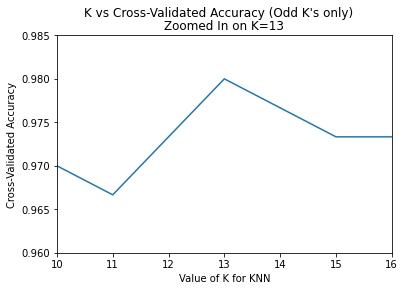

In [46]:
plt.suptitle("K vs Cross-Validated Accuracy (Odd K's only)")
plt.title("Zoomed In on K=13")
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.axis([10,16, 0.96, 0.985])
plt.plot(xValues, yValues)

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid.fit(iris.data,iris.target)

#this confirms the best_estimator is k=13
print(grid.best_estimator_)
print("Best accuracy: " + grid.best_score_)



KNeighborsClassifier(n_neighbors=13)
